In [9]:
import lightgbm as lgb
import yaml
import shap
import os
import pickle

In [28]:
with open("../params.yaml", 'r') as fd:
    params = yaml.safe_load(fd)
    
pickledir = params['prepare-step2']['pickle-dir']
modeldir = params['training']['model-dir']
metricsdir = params['create-metrics']['metrics-dir']
metricsdir2 = params['create-metrics']['metrics-dir2']

models = os.listdir('../' + modeldir)
model = models[0]

with open(pickledir, 'rb') as fd:
    each_faction_dataset = pickle.load(fd)

# load model
# modelfile = modeldir + model
faction = 'swarmlings'
modelfile = 'D://PycharmProjects/TerraBot/data/faction-picker-bot/models/swarmlings_model.txt'
faction = model.split('_')[0]
bst = lgb.Booster(model_file=modelfile)  # init model

Xdata = each_faction_dataset[faction]['features']
Xdata = Xdata.drop(['Unnamed: 0', 'game'], axis=1)

In [29]:
bst.params["objective"] = "regression"

In [30]:
Xsmall = Xdata.iloc[:100, :]
print(Xsmall.shape)

ypred = bst.predict(Xsmall)

(100, 71)


In [33]:
print(Xsmall.columns)

Index(['r1_SCORE1', 'r1_SCORE2', 'r1_SCORE3', 'r1_SCORE4', 'r1_SCORE5',
       'r1_SCORE6', 'r1_SCORE7', 'r1_SCORE8', 'r1_SCORE9', 'r2_SCORE1',
       'r2_SCORE2', 'r2_SCORE3', 'r2_SCORE4', 'r2_SCORE5', 'r2_SCORE6',
       'r2_SCORE7', 'r2_SCORE8', 'r2_SCORE9', 'r3_SCORE1', 'r3_SCORE2',
       'r3_SCORE3', 'r3_SCORE4', 'r3_SCORE5', 'r3_SCORE6', 'r3_SCORE7',
       'r3_SCORE8', 'r3_SCORE9', 'r4_SCORE1', 'r4_SCORE2', 'r4_SCORE3',
       'r4_SCORE4', 'r4_SCORE5', 'r4_SCORE6', 'r4_SCORE7', 'r4_SCORE8',
       'r4_SCORE9', 'r5_SCORE1', 'r5_SCORE2', 'r5_SCORE3', 'r5_SCORE4',
       'r5_SCORE5', 'r5_SCORE6', 'r5_SCORE7', 'r5_SCORE8', 'r5_SCORE9',
       'r6_SCORE1', 'r6_SCORE2', 'r6_SCORE3', 'r6_SCORE4', 'r6_SCORE5',
       'r6_SCORE6', 'r6_SCORE7', 'r6_SCORE8', 'r6_SCORE9', 'BON1', 'BON2',
       'BON3', 'BON4', 'BON5', 'BON6', 'BON7', 'BON8', 'BON9', 'BON10',
       '2players', '3players', '4players', '5players', 'map1', 'map2', 'map3'],
      dtype='object')


In [ ]:
# give new columns
SCORE1 = 'SPADE >> 2'  
SCORE2 = 'TOWN >> 5'  
SCORE3 = 'D >> 2'  
SCORE4 = 'SA/SH >> 5'  
SCORE5 = 'D >> 2'  
SCORE6 = 'TP >> 3'  
SCORE7 = 'SA/SH >> 5'  
SCORE8 = 'TP >> 3'  
SCORE9 = 'TE >> 4'

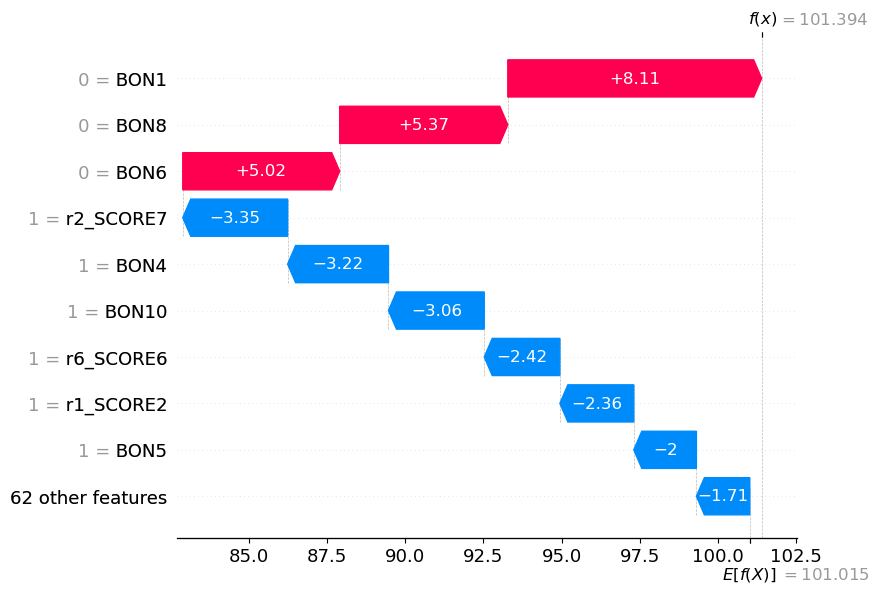

In [31]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(bst)
shap_values = explainer(Xsmall)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

(100, 71)